# House Price Prediction for Clustering

## 1. Problema de Negócio

- Suponha que você faça parte da equipe de uma imobiliária que busca aprimorar a forma como os corretores sugerem residências aos clientes. O objetivo é criar um sistema que facilite a seleção de residências adequadas quando um cliente com um perfil específico busca orientação. Esse sistema utilizará um método de agrupamento inteligente.


- O conjunto de dados que você usará é [HOUSE PRICE PREDICTION - SEATTLE](https://www.kaggle.com/datasets/samuelcortinhas/house-price-prediction-seattle).




## 2. Importar bibliotecas e conjunto de dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0


- A variável lot_size_units possui duas unidades diferentes de área.

### 2.1 Análises preliminares

In [2]:
# Obter uma descrição dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


- 7 variáveis e 2016 observações no dataset e a variável price é a variável alvo. A variable lot_size e lot_size_units tem missing values. 

### Metadados:

>  - beds - Número de quartos na propriedade
>  - baths - Número de banheiros na propriedade (0.5 corresponde a um lavabo que tem uma pia e vaso sanitário, mas sem banheira ou chuveiro)
>  - size - Área útil total do imóvel
>  - size_units - Unidades da medida anterior (sqft:Square Foot=Pé Quadrado)
>  - lot_size - Área total do terreno onde se localiza o imóvel
>  - lot_size_units - Unidades da medida anterior (sqft ou acre) e 1 acre = 43560 sqft  
>  - zip_code - Código Postal. Este é um código postal usado nos EUA
>  - price - Preço pelo qual a propriedade foi vendida (dólares americanos)  

## 3. Pré-processamento 

### 3.1 Descarte de variáveis não importantes e conversão de acre para sqft

In [3]:
df1 = df.drop(['size_units','lot_size_units', 'zip_code'],axis=1)

def foot(row):
    if row['lot_size_units'] == 'acre':
        return row['lot_size'] * 43560
    else:
        return row['lot_size']
    
df1['lot_size'] = df.apply(foot, axis=1)
df1


,beds,baths,size,lot_size,price
0,3,2.5,2590.0,6000.0,795000.0
1,4,2.0,2240.0,13503.6,915000.0
2,4,3.0,2040.0,3783.0,950000.0
3,4,3.0,3800.0,5175.0,1950000.0
4,2,2.0,1042.0,NaN,950000.0
...,...,...,...,...,...
2011,3,2.0,1370.0,21780.0,910000.0
2012,1,1.0,889.0,NaN,550000.0
2013,4,2.0,2140.0,6250.0,1150000.0
2014,2,2.0,795.0,NaN,590000.0


### 3.2 Remoção de linhas duplicadas e  dados faltantes

In [4]:
# Linhas duplicadas
df1.duplicated().sum()

9

In [5]:
# Dados faltantes
df1.isnull().sum()

beds          0
baths         0
size          0
lot_size    347
price         0
dtype: int64

In [6]:
df1=df1.drop_duplicates()
df1 = df1.dropna()

df1

,beds,baths,size,lot_size,price
0,3,2.5,2590.0,6000.0,795000.0
1,4,2.0,2240.0,13503.6,915000.0
2,4,3.0,2040.0,3783.0,950000.0
3,4,3.0,3800.0,5175.0,1950000.0
5,2,2.0,1190.0,43560.0,740000.0
...,...,...,...,...,...
2009,3,3.5,1680.0,1486.0,675000.0
2010,2,2.0,1400.0,14810.4,699950.0
2011,3,2.0,1370.0,21780.0,910000.0
2013,4,2.0,2140.0,6250.0,1150000.0


In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,1660.0,3.128916e+00,1.185204e+00,1.0,2.00,3.0,4.00,15.0
baths,1660.0,2.296988e+00,1.009624e+00,0.5,1.50,2.0,3.00,9.0
size,1660.0,1.897614e+03,9.164732e+02,250.0,1260.00,1720.0,2370.00,11010.0
lot_size,1660.0,1.886929e+04,2.888464e+05,500.0,2796.25,5000.0,7359.75,10890000.0
price,1660.0,1.039419e+06,1.010520e+06,159000.0,680000.00,865000.0,1180000.00,25000000.0


- Antes de proceder com a realização do agrupamento com base nas características da residência, é possível fazer uma seleção de variáveis através de aprendizagem supervisionada.

## 4. Modelo de Regressão

### 4.1 Divisão em treino e teste

In [8]:
X = df1.drop(['price'],axis=1)
y = df1.price

from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, random_state=1977)
                                         
X_tr.shape, X_ts.shape


((1245, 4), (415, 4))

### 4.2 Árvores de Decisão¶

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

params = {
    'max_leaf_nodes': np.unique( np.logspace(2,12,20,base=2,dtype=int) ),
}

grid = GridSearchCV(
    DecisionTreeRegressor(criterion='absolute_error', random_state=1977),
    params,
    scoring='neg_mean_absolute_error',
    cv=10,
    verbose=10,
    n_jobs=6,
)

grid.fit(X_tr, y_tr)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_ts, grid.predict(X_ts))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


285782.10602409637

In [10]:
# Quais foram os melhores parâmetros?
grid.best_params_

{'max_leaf_nodes': 11}

### IMPORTÂNCIA DE VARIÁVEIS

In [11]:
cols = X_tr.columns
imps = grid.best_estimator_.feature_importances_
order= np.argsort(imps)[::-1]

for col,imp in zip(cols[order],imps[order]):
    print(f'{col:30s} | {imp:5.3f}')

size                           | 0.877
beds                           | 0.053
lot_size                       | 0.050
baths                          | 0.019


- Aqui o objetivo não é ter a melhor variável resposta, não queremos prever ela. Queremos uma variável resposta que nos ajuda a decidir qual visão queremos dar para o agrupamento.

## 5. Modelo de agrupamento

In [12]:
# Selecionando as duas variáveis mais importantes do modelo Árvores de Decisão

sel_cols = [
    'size',
    'beds',
]

X_tr[sel_cols]

,size,beds
1406,1360.0,3
1419,2450.0,5
607,2470.0,5
602,2510.0,5
77,1800.0,3
...,...,...
523,2310.0,5
1212,1718.0,3
582,3130.0,3
1007,2390.0,3


### 5.1 Escalar as variáveis

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_tr[sel_cols],y_tr)

X_tr_s = pd.DataFrame(scaler.transform(X_tr[sel_cols]), index=X_tr.index, columns=sel_cols)
X_ts_s = pd.DataFrame(scaler.transform(X_ts[sel_cols]), index=X_ts.index, columns=sel_cols)

X_tr_s

,size,beds
1406,-0.599056,-0.115863
1419,0.569649,1.532696
607,0.591093,1.532696
602,0.633981,1.532696
77,-0.127285,-0.115863
...,...,...
523,0.419540,1.532696
1212,-0.215206,-0.115863
582,1.298749,-0.115863
1007,0.505316,-0.115863


### 5.2 Escolhendo o número de clusters

In [14]:
from sklearn.cluster import KMeans

n_clusts = range(2,21)
inercias = []
for n_clus in n_clusts:
    print(n_clus)
    km = KMeans(n_clusters=n_clus, n_init=200, max_iter=3000)
    km.fit(X_tr_s)
    inercias.append( km.inertia_ )
    
inercias

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


[1227.4724898210009,
 885.3487854812017,
 670.8058955381763,
 536.2161866649168,
 448.54695382203136,
 381.28114292802627,
 324.67756626875257,
 279.5053539064359,
 235.14878682725234,
 206.5517529475178,
 181.26933891911565,
 159.17191070208452,
 140.21992392203833,
 123.19542581306115,
 111.71111383144496,
 100.97287846034433,
 90.30327207398281,
 80.78121053493915,
 72.34480603846613]

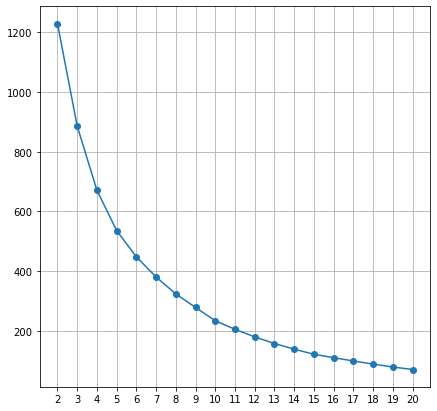

In [15]:
plt.figure(figsize=(7,7))
plt.plot(n_clusts, inercias, 'o-')
plt.xticks(n_clusts)
plt.grid();

- Vamos segmentar as residências em 4 clusters e adicionar uma coluna chamada "Cluster" com o índice do cluster em que cada residência se enquadra.

In [16]:
n_clus = 4
km = KMeans(n_clusters=n_clus, n_init=200, max_iter=3000, random_state=1977)
km.fit(X_tr_s)

X_tr_clus = X_tr.copy()
X_ts_clus = X_ts.copy()

X_tr_clus = X_tr_clus.join(y_tr)
X_ts_clus = X_ts_clus.join(y_ts)

X_tr_clus.loc[:,'cluster'] = km.predict(X_tr_s)
X_ts_clus.loc[:,'cluster'] = km.predict(X_ts_s)

In [17]:
X_tr_clus

,beds,baths,size,lot_size,price,cluster
1406,3,2.0,1360.0,7680.0,830000.0,1
1419,5,3.0,2450.0,4980.0,1270000.0,2
607,5,4.0,2470.0,5000.0,1005000.0,2
602,5,3.0,2510.0,5130.0,910000.0,2
77,3,1.0,1800.0,11761.2,549000.0,1
...,...,...,...,...,...,...
523,5,3.0,2310.0,4011.0,780000.0,2
1212,3,2.5,1718.0,1268.0,900000.0,1
582,3,3.5,3130.0,12196.8,2350000.0,2
1007,3,2.0,2390.0,10890.0,1150000.0,1


### 5.3 Interpretando os clusters

In [18]:
def q05(grp):
    return grp.quantile(0.05)
def q95(grp):
    return grp.quantile(0.95)

X_ts_clus.groupby('cluster')[sel_cols+['price']].agg([q05,'median',q95])

size                 beds                  price             \
            q05  median     q95  q05 median  q95        q05     median   
cluster                                                                  
0        3760.5  4574.5  7386.0  5.0    6.0  9.0  1131350.0  1715000.0   
1        1060.0  1620.0  2306.0  3.0    3.0  4.0   497640.0   825000.0   
2        2040.0  2620.0  3542.0  3.0    4.0  5.0   728400.0  1250000.0   
3         630.0  1070.0  1760.2  1.0    2.0  2.0   365960.0   679000.0   

                    
               q95  
cluster             
0        3837500.0  
1        1401200.0  
2        2156000.0  
3        1278000.0

- O Cluster 0, em sua maioria, é caracterizado por residências com áreas úteis mais amplas, um maior número de quartos e uma mediana de preço em torno de 1.7 milhões.
- O Cluster 3, em geral, é composto por residências com áreas úteis menores, um menor número de quartos e preços mais acessíveis.
- O Cluster 1 e o Cluster 2 apresentam residências de características intermediárias. No Cluster 2, é comum encontrar casas com uma maior quantidade de quartos e áreas úteis mais amplas em comparação ao Cluster 1. No entanto, as residências do Cluster 1 tendem a ter preços mais baixos de forma geral.

## 6. Conclusão

- Realizamos o agrupamento com base nas características das residências, como a área útil e o número de quartos. Os clusters formados revelam padrões distintos de distribuição dessas características entre os grupos identificados.


- Podemos incorporar variáveis adicionais, como o número de banheiros, para a interpretação do agrupamento, é possível aprimorar nossa compreensão das características distintas presentes em cada cluster. 


- Podemos utilizar o projeto  como ponto de partida para realizar a tarefa de agrupamento em um conjunto de dados que tenha muitas mais  variáveis por exemplo [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques). Além disso, é possível aplicar o algoritmo Random Forest  para identificar as variáveis mais importantes para o seu processo de agrupamento. 